# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2381 Долотов Никита Андреевич и Зазуля Илья Анатольевич. Вариант №5.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Входной сигнал можно представить в виде суммы гармонических составляющих:

$$
s(t) = \sum_{m=1}^{M} c_m e^{i \omega_m t}
$$

После прохождения через фильтр каждая частотная компонента изменяется в соответствии с передаточной функцией $H(\omega)$, и выходной сигнал принимает вид:

$$
y(t) = \sum_{m=1}^{M} c_m H(\omega_m) e^{i \omega_m t}
$$

Передаточная функция фильтра определяется как отношение спектров выходного и входного сигналов:

$$
H(\omega) = \frac{Y(\omega)}{S(\omega)}
$$

Связь между круговой и циклической частотой выражается формулой:

$$
\omega = 2\pi f, \quad H(\omega) = \tilde{H}(f)
$$

Для анализа частотных свойств фильтра амплитуду передаточной функции часто выражают в логарифмической шкале (децибелах):

$$
|H(f)|_{dB} = 20 \log_{10} |H(f)|
$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

### Задание 1

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

In [66]:
import numpy as np
import matplotlib.pyplot as plt


# Частотная ось
f = np.linspace(0, 0.5, 2000)
omega = 2 * np.pi * f

# Функция для построения графиков передаточных функций
def plot_transfer_function(f, data_dict, title, log_scale=False):
    plt.figure(figsize=(8, 5))

    for label, H in data_dict.items():
        if log_scale:
            eps = 1e-10
            plt.plot(f, [20 * np.log10(abs(h) + eps) for h in H], label=label)
        else:
            plt.plot(f, H, label=label)

    plt.title(title)
    plt.xlabel('f')
    plt.ylabel('$\\tilde H(f)$, дБ' if log_scale else '$\\tilde H(f)$')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

Рассмотрим аппроксимацию временного ряда линейной зависимостью:

$$
y(n) = a + bn,
$$

где $a$ и $b$ – коэффициенты, определяемые МНК.



#### Случай сглаживания по 3 точкам

Для оценки параметров составим функционал невязки:

$$
J(a,b) = \sum_{k=-1}^{1} [s_k - (a + bk)]^2,
$$
где $s_k$ – значения исходного дискретного сигнала.

Найдем экстремум функции $J(a,b)$ по переменным $a$ и $b$.

Приравняем частные производные к нулю:

$$
\frac{\partial J}{\partial a} = 0,\quad
\frac{\partial J}{\partial b} = 0.
$$

После раскрытия сумм получаем систему нормальных уравнений:

$$
\begin{cases}
3a + b\sum k = \sum s_k, \\[4pt]
a\sum k + b\sum k^2 = \sum ks_k.
\end{cases}
$$

Так как $\sum k = 0$ для симметричных индексов $(-1,0,1)$, система упрощается:

$$
\begin{cases}
3a = \sum s_k, \\[4pt]
2b = \sum ks_k.
\end{cases}
$$

Отсюда:

$$
a = \frac{1}{3}\sum_{k=-1}^{1}s_k.
$$

Следовательно, значение сглаженного сигнала в центральной точке:

$$
y_0 = a = \frac{1}{3}(s_{-1} + s_0 + s_{1}).
$$

В общем виде для последовательности $s_n$:

$$
y_n = \frac{1}{3}(s_{n-1} + s_n + s_{n+1}).
$$

#### Частотный анализ

Пусть входной сигнал имеет вид $s_n = e^{i\omega n}$.

Тогда на выходе получим:

$$
y_n = \frac{1}{3}\big(e^{i\omega(n-1)} + e^{i\omega n} + e^{i\omega(n+1)}\big)
= \frac{1}{3}(e^{-i\omega} + 1 + e^{i\omega})e^{i\omega n}.
$$

Из этого следует, что передаточная функция фильтра равна:

$$
H(\omega) = \frac{1}{3}(e^{-i\omega} + 1 + e^{i\omega}) = \frac{1}{3}\big(1 + 2\cos(\omega)\big).
$$

#### Сглаживание по 5 точкам

$$
H(\omega) = \frac{1}{5}(e^{-2i\omega} + e^{-i\omega} + 1 + e^{i\omega} + e^{2i\omega})
= \frac{1}{5}\big(1 + 2\cos(\omega) + 2\cos(2\omega)\big).
$$

#### Сглаживание по 7 точкам

$$
H(\omega) = \frac{1}{7}(e^{-3i\omega} + e^{-2i\omega} + e^{-i\omega} + 1 + e^{i\omega} + e^{2i\omega} + e^{3i\omega})
= \frac{1}{7}\big(1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega)\big).
$$

#### Сглаживание по 9 точкам

$$
H(\omega) = \frac{1}{9}(e^{-4i\omega} + e^{-3i\omega} + e^{-2i\omega} + e^{-i\omega} + 1 + e^{i\omega} + e^{2i\omega} + e^{3i\omega} + e^{4i\omega})
= \frac{1}{9}\big(1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega)\big).
$$

In [67]:
# Передаточные функции
H3 = (1 / 3) * (1 + 2 * np.cos(omega))
H5 = (1 / 5) * (1 + 2 * np.cos(omega) + 2 * np.cos(2 * omega))
H7 = (1 / 7) * (1 + 2 * np.cos(omega) + 2 * np.cos(2 * omega) + 2 * np.cos(3 * omega))
H9 = (1 / 9) * (1 + 2 * np.cos(omega) + 2 * np.cos(2 * omega) + 2 * np.cos(3 * omega) + 2 * np.cos(4 * omega))

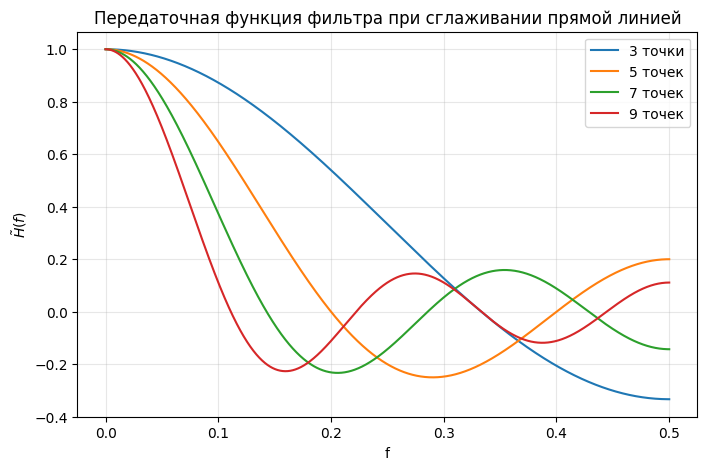

In [68]:
# Построение графиков
plot_transfer_function(
    f,
    {'3 точки': H3, '5 точек': H5, '7 точек': H7, '9 точек': H9},
    'Передаточная функция фильтра при сглаживании прямой линией'
)

Все фильтры сохраняют постоянную составляющую сигнала. При увеличении числа точек $N$ сглаживание усиливается, а высокочастотные компоненты подавляются сильнее. Амплитуда передаточной функции уменьшается с ростом частоты и стремится к нулю при $f = 0{.}5$. При $N = 9$ фильтр сглаживает максимально, но начинает ослаблять и низкие частоты, что приводит к потере деталей сигнала.

### Задание 2

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Рассмотрим аппроксимацию дискретного сигнала квадратичным полиномом вида:

$$
y(n) = A + Bn + Cn^2,
$$

где $A$, $B$ и $C$ – параметры, определяемые МНК.

#### Вывод для 7 точек

Функционал невязки запишем как:

$$
J(A,B,C) = \sum_{k=-3}^{3} [s_k - (A + Bk + Ck^2)]^2.
$$

Приравняем частные производные к нулю, чтобы найти экстремум:

$$
\frac{\partial J}{\partial A} = 0, \quad
\frac{\partial J}{\partial B} = 0, \quad
\frac{\partial J}{\partial C} = 0.
$$

После раскрытия сумм получаем систему:

$$
\begin{cases}
7A + 28C = \sum s_k, \\
28B = \sum k s_k, \\
28A + 196C = \sum k^2 s_k.
\end{cases}
$$

Так как выборка симметрична относительно нуля, члены с нечётными степенями исчезают.

Решая эту систему, получаем коэффициент $A$ при центральном отсчёте:

$$
y_0 = A = \frac{1}{21}(-2s_{-3} + 3s_{-2} + 6s_{-1} + 7s_0 + 6s_1 + 3s_2 - 2s_3).
$$

Обобщённая форма сглаживающего фильтра:

$$
y_n = \frac{1}{21}(-2s_{n-3} + 3s_{n-2} + 6s_{n-1} + 7s_{n} + 6s_{n+1} + 3s_{n+2} - 2s_{n+3}).
$$

#### Частотная характеристика

Если на вход подать гармонический сигнал $s_n = e^{i\omega n}$, то на выходе будет:

$$
y_n = \frac{1}{21}\left(-2e^{-3i\omega} + 3e^{-2i\omega} + 6e^{-i\omega} + 7 + 6e^{i\omega} + 3e^{2i\omega} - 2e^{3i\omega}\right)e^{i\omega n}.
$$

Тогда передаточная функция:

$$
H(\omega) = \frac{1}{21}\left(7 + 12\cos(\omega) + 6\cos(2\omega) - 4\cos(3\omega)\right).
$$

#### Для других чисел точек

$$
\begin{aligned}
H_9(\omega) &= \frac{1}{231}\left(59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega)\right), \\[6pt]
H_{11}(\omega) &= \frac{1}{429}\left(89 + 168\cos(\omega) + 138\cos(2\omega) + 88\cos(3\omega) + 18\cos(4\omega) - 72\cos(5\omega)\right), \\[6pt]
H_{13}(\omega) &= \frac{1}{143}\left(25 + 48\cos(\omega) + 42\cos(2\omega) + 32\cos(3\omega) + 18\cos(4\omega) - 22\cos(6\omega)\right).
\end{aligned}
$$

In [69]:
# Передаточные функции
H7_2 = (1 / 21) * (7 + 12 * np.cos(omega) + 6 * np.cos(2 * omega) - 4 * np.cos(3 * omega))
H9_2 = (1 / 231) * (59 + 108 * np.cos(omega) + 78 * np.cos(2 * omega) + 28 * np.cos(3 * omega) - 42 * np.cos(4 * omega))
H11_2 = (1 / 429) * (89 + 168 * np.cos(omega) + 138 * np.cos(2 * omega) + 88 * np.cos(3 * omega) + 18 * np.cos(4 * omega) - 72 * np.cos(5 * omega))
H13_2 = (1 / 143) * (25 + 48 * np.cos(omega) + 42 * np.cos(2 * omega) + 32 * np.cos(3 * omega) + 18 * np.cos(4 * omega) - 22 * np.cos(6 * omega))

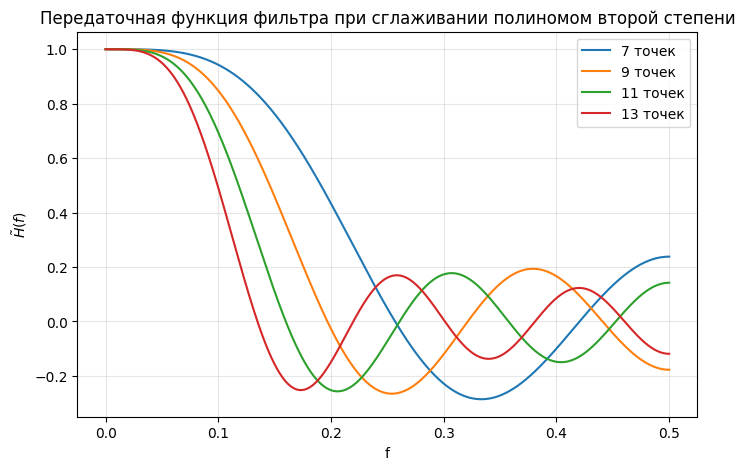

In [70]:
# Построение графиков
plot_transfer_function(
    f,
    {'7 точек': H7_2, '9 точек': H9_2, '11 точек': H11_2, '13 точек': H13_2},
    'Передаточная функция фильтра при сглаживании полиномом второй степени'
)

Все полученные фильтры пропускают постоянную составляющую сигнала. При увеличении числа точек $N$ характеристика $H(f)$ становится более узкой, высокие частоты подавляются сильнее, а переход к нулю происходит резче. Фильтр с большим окно ($N=13$) сглаживает сигнал наиболее эффективно,
но при этом может ослаблять и полезные низкочастотные компоненты, что приводит к потере мелких деталей исходного ряда.

### Задание 3

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Рассмотрим аппроксимацию дискретного сигнала полиномом четвёртой степени:

$$
y(n)=A + B n + C n^2 + D n^3 + E n^4,
$$

где $A,B,C,D,E$ – параметры, определяемые МНК.

#### Вывод для 9 точек

Функционал невязки:

$$
J(A,B,C,D,E)=\sum_{k=-4}^{4} \bigl(s_{n+k} - (A + Bk + Ck^2 + Dk^3 + Ek^4)\bigr)^2.
$$

Приравняем частные производные к нулю и получаем систему нормальных уравнений:

$$
\begin{cases}
9A + 60C + 708E = \sum s_k, \\
60B + 708D = \sum ks_k, \\
60A + 708C + 9780E = \sum k^2 s_k, \\
708B + 9780D = \sum k^3 s_k, \\
708A + 9780C + 144708E = \sum k^4 s_k.
\end{cases}
$$

Решая эту систему, получаем коэффициент $A$ при центральном отсчёте:

$$
y_0 = A = \frac{1}{429} (15s_{-4} - 55s_{-3} + 30s_{-2} + 135s_{-1} + 179s_{0} + 135s_{1} + 30s_{2} - 55s_{3} + 15s_{4})
$$

Обобщённая форма:

$$
y_n = \frac{1}{429}\bigl(15s_{n-4} - 55s_{n-3} + 30s_{n-2} + 135s_{n-1} + 179s_n + 135s_{n+1} + 30s_{n+2} -55s_{n+3} + 15s_{n+4}\bigr).
$$

Если на вход подать гармонический сигнал $s_n = e^{i\omega n}$, то на выходе будет:

$$
y_n = \frac{1}{429} (15e^{-4iw} - 55e^{-3iw} + 30e^{-2iw} + 135e^{-iw} + 179 + 135e^{iw} + 30e^{2iw} - 55e^{3iw} + 15e^{4iw}) e^{iwn}
$$

Тогда передаточная функция:

$$
H(w) = \frac{1}{429} (179 + 270cos(w) + 60cos(2w) - 110cos(3w) + 30cos(4w))
$$

#### Для других чисел точек

$$
H_{11}(\omega)=\frac{1}{429}\bigl(143 + 240\cos\omega + 120\cos(2\omega) -20\cos(3\omega) -90\cos(4\omega) +36\cos(5\omega)\bigr).
$$

$$
H_{13}(\omega)=\frac{1}{2431}\bigl(677 + 1200\cos\omega + 780\cos(2\omega) + 220\cos(3\omega) -270\cos(4\omega) -396\cos(5\omega) +220\cos(6\omega)\bigr).
$$

$$
H_{15}(\omega)=\frac{1}{46189}\bigl(11063 + 20250\cos\omega + 15000\cos(2\omega) + 7510\cos(3\omega) -330\cos(4\omega) -5874\cos(5\omega) -5720\cos(6\omega) +4290\cos(7\omega)\bigr).
$$

In [71]:
# Передаточные функции
H9_4 = (1 / 429) * (179 + 270 * np.cos(omega) + 60 * np.cos(2 * omega) - 110 * np.cos(3 * omega) + 30 * np.cos(4 * omega))
H11_4 = (1 / 429) * (143 + 240 * np.cos(omega) + 120 * np.cos(2 * omega) - 20 * np.cos(3 * omega) - 90 * np.cos(4 * omega) + 36 * np.cos(5 * omega))
H13_4 = (1 / 2431) * (677 + 1200 * np.cos(omega) + 780 * np.cos(2 * omega) + 220 * np.cos(3 * omega) - 270 * np.cos(4 * omega) - 396 * np.cos(5 * omega) + 220 * np.cos(6 * omega))
H15_4 = (1 / 46189) * (11063 + 20250 * np.cos(omega) + 15000 * np.cos(2 * omega) + 7510 * np.cos(3 * omega) - 330 * np.cos(4 * omega) - 5874 * np.cos(5 * omega) - 5720 * np.cos(6 * omega) + 4290 * np.cos(7 * omega))

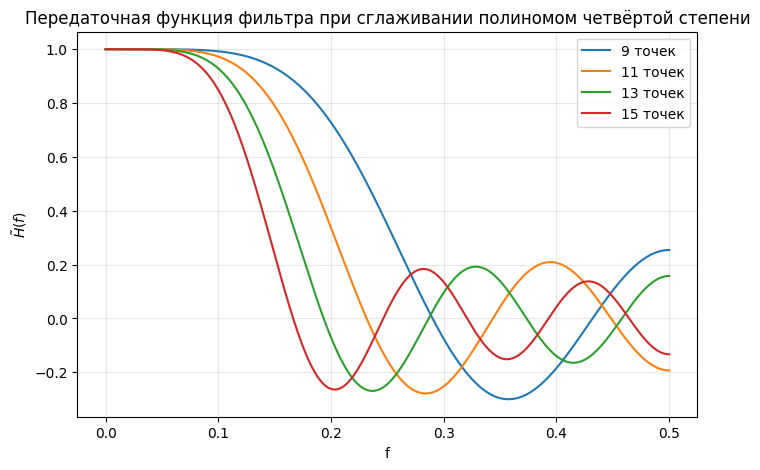

In [72]:
# Построение графиков
plot_transfer_function(
    f,
    {'9 точек': H9_4, '11 точек': H11_4, '13 точек': H13_4, '15 точек': H15_4},
    'Передаточная функция фильтра при сглаживании полиномом четвёртой степени'
)

По сравнению с фильтрацией полиномом второго порядка частотная характеристика стала более узкой, что указывает на сильное сглаживание сигнала и лучшее подавление высокочастотных составляющих. С ростом числа точек окно фильтра расширяется, полоса пропускания уменьшается, а спад передаточной функции становится более резким, что усиливает подавление шумов, но может приводить к потере мелких деталей исходного сигнала.

### Задание 4

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

#### Вывод для 15 точек

Выпишем формулу Спенсера для сглаживания по 15 точкам:

$$
y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})
$$

Тогда, при $s_n = e^{i \omega n}$, выходной сигнал:

$$
y_n = \frac{1}{320} \bigl( -3e^{i \omega (n-7)} - 6e^{i \omega (n-6)} - 5e^{i \omega (n-5)} + 3e^{i \omega (n-4)} + 21e^{i \omega (n-3)} + 46e^{i \omega (n-2)} + 67e^{i \omega (n-1)} + 74e^{i \omega n} + 67e^{i \omega (n+1)} + 46e^{i \omega (n+2)} + 21e^{i \omega (n+3)} + 3e^{i \omega (n+4)} - 5e^{i \omega (n+5)} - 6e^{i \omega (n+6)} - 3e^{i \omega (n+7)} \bigr)
$$

Следовательно, передаточная функция:

$$
H(\omega)=\frac{1}{320}(74+134\cos(\omega)+92\cos(2\omega)+42\cos(3\omega)+6\cos(4\omega)-10\cos(5\omega)-12\cos(6\omega)-6\cos(7\omega))
$$

#### Для 21 точки

$$
H(\omega)=\frac{1}{350}(60+114\cos(\omega)+94\cos(2\omega)+66\cos(3\omega)+36\cos(4\omega)+12\cos(5\omega)-4\cos(6\omega)-10\cos(7\omega)-10\cos(8\omega)-6\cos(9\omega)-2\cos(10\omega))
$$

In [73]:
# Передаточные функции
H15_Spencer = (1 / 320) * (74 + 134 * np.cos(omega) + 92 * np.cos(2 * omega) + 42 * np.cos(3 * omega) + 6 * np.cos(4 * omega) - 10 * np.cos(5 * omega) - 12 * np.cos(6 * omega) - 6 * np.cos(7 * omega))
H21_Spencer = (1 / 350) * (60 + 114 * np.cos(omega) + 94 * np.cos(2 * omega) + 66 * np.cos(3 * omega) + 36 * np.cos(4 * omega) + 12 * np.cos(5 * omega) - 4 * np.cos(6 * omega) - 10 * np.cos(7 * omega) - 10 * np.cos(8 * omega) - 6 * np.cos(9 * omega) - 2 * np.cos(10 * omega))

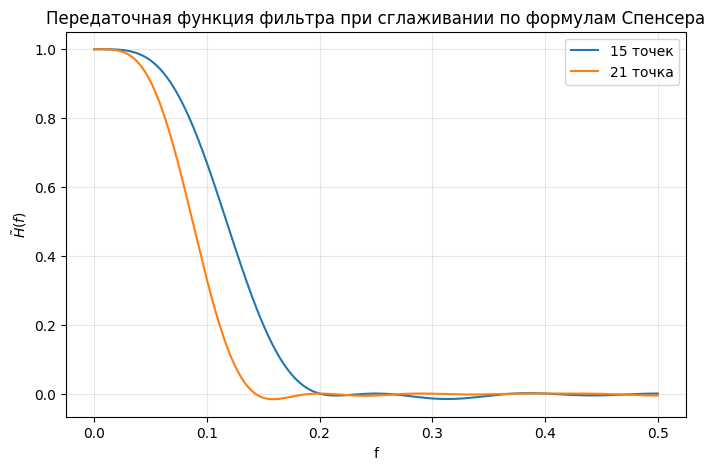

In [74]:
# Построение графиков
plot_transfer_function(
    f,
    {'15 точек': H15_Spencer, '21 точка': H21_Spencer},
    'Передаточная функция фильтра при сглаживании по формулам Спенсера'
)

Фильтры Спенсера обладают выраженными низкочастотными свойствами: с ростом числа точек их полоса пропускания становится уже, а высокочастотные компоненты практически полностью подавляются. Передаточная функция плавно убывает без значительных колебаний амплитуды, обеспечивая более стабильное сглаживание по сравнению с предыдущими типами фильтров.

### Задание 5

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

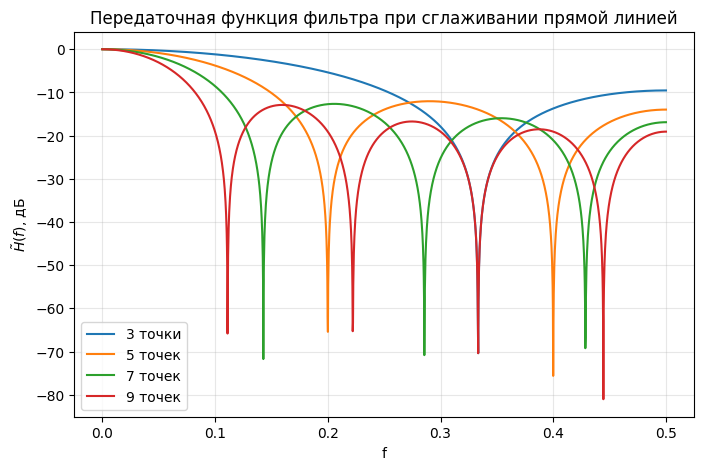

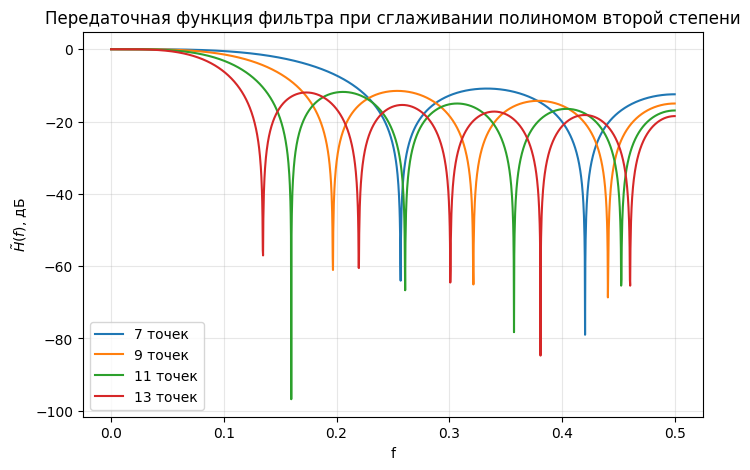

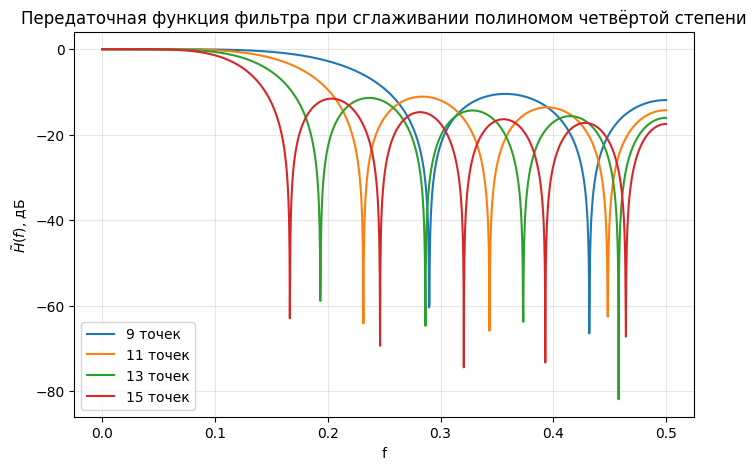

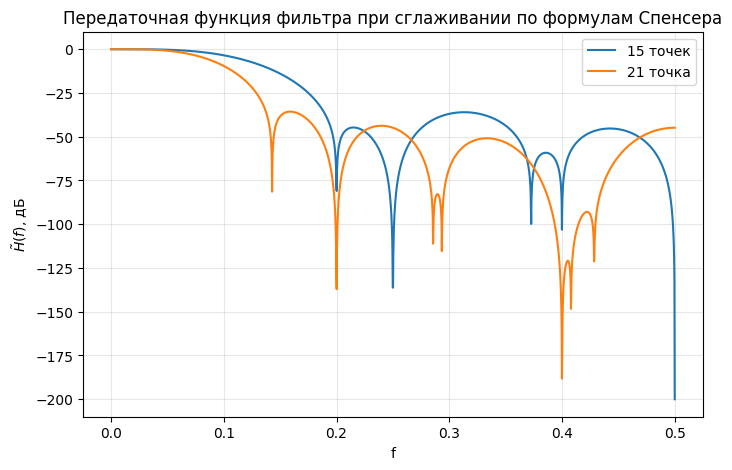

In [75]:
plot_transfer_function(
    f,
    {'3 точки': H3, '5 точек': H5, '7 точек': H7, '9 точек': H9},
    'Передаточная функция фильтра при сглаживании прямой линией',
    True
)

plot_transfer_function(
    f,
    {'7 точек': H7_2, '9 точек': H9_2, '11 точек': H11_2, '13 точек': H13_2},
    'Передаточная функция фильтра при сглаживании полиномом второй степени',
    True
)

plot_transfer_function(
    f,
    {'9 точек': H9_4, '11 точек': H11_4, '13 точек': H13_4, '15 точек': H15_4},
    'Передаточная функция фильтра при сглаживании полиномом четвёртой степени',
    True
)

plot_transfer_function(
    f,
    {'15 точек': H15_Spencer, '21 точка': H21_Spencer},
    'Передаточная функция фильтра при сглаживании по формулам Спенсера',
    True
)


На линейных графиках хорошо прослеживается форма передаточной функции и положение полосы пропускания, однако области с малой амплитудой выражены слабо. Использование логарифмической шкалы позволяет детальнее рассмотреть зону подавления и наглядно показать степень ослабления высоких частот, что делает анализ эффективности фильтрации более информативным.

### Задание 6

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1-4.

Сравнение передаточных функций показывает, что все рассмотренные фильтры обладают низкочастотными свойствами: они эффективно ослабляют высокие частоты и сохраняют низкие. Увеличение числа точек делает спад функции более резким и усиливает сглаживание. С ростом степени полинома полоса пропускания становится шире, но возрастает уровень колебаний на высоких частотах. Фильтр Спенсера выгодно отличается – он обеспечивает стабильное подавление высокочастотных компонентов без выраженных колебаний, что делает его наиболее устойчивым и гладким среди рассмотренных вариантов.

## Выводы

В ходе выполнения лабораторной работы были получены передаточные функции нерекурсивных фильтров для полиномиального сглаживания степеней 1, 2, 4 и формул Спенсера с различным числом точек. Построены графики $\tilde H(f)$ в линейном и логарифмическом масштабах. Анализ показал, что увеличение числа точек сужает полосу пропускания и усиливает подавление высоких частот. Логарифмическая шкала позволила выявить боковые лепестки и оценить уровень подавления в полосе заграждения. Сравнение фильтров показало, что повышение степени полинома и использование формул Спенсера улучшает селективность подавления шума при сохранении низкочастотных компонент сигнала.